In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
image_data = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
flower = tf.keras.utils.get_file('flower_photos', origin=image_data, untar=True)
flower = pathlib.Path(flower)

In [ ]:
#Số lượng file ảnh
image = len(list(flower.glob('*/*.jpg')))
print(image)

3670


In [ ]:
#Tên thư mục con


Trải nghiệm 

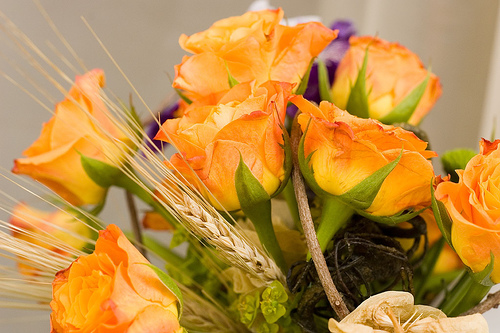

In [ ]:
#Ảnh hoa hồng
hoa_hong = list(flower.glob('roses/*'))
PIL.Image.open(str(hoa_hong[1]))

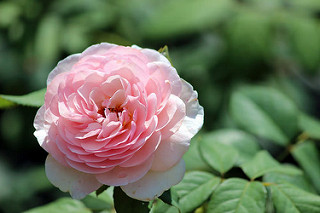

In [ ]:
PIL.Image.open(str(hoa_hong[3]))

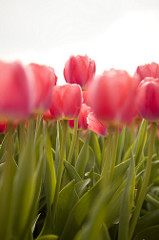

In [ ]:
#Ảnh hoa tulip 
hoa_tulips = list(flower.glob('tulips/*'))
PIL.Image.open(str(hoa_tulips[2]))

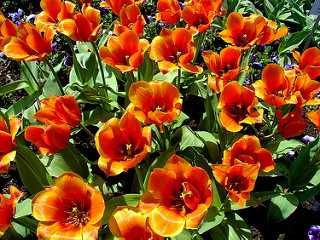

In [ ]:
PIL.Image.open(str(hoa_tulips[4]))

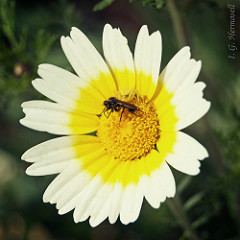

In [ ]:
#Ảnh hoa cúc 
hoa_cuc = list(flower.glob('daisy/*'))
PIL.Image.open(str(hoa_cuc[7]))

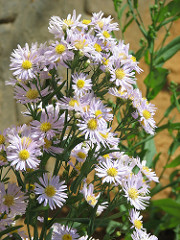

In [ ]:
PIL.Image.open(str(hoa_cuc[9]))

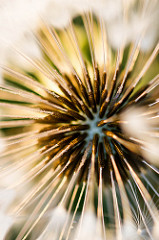

In [ ]:
#Hoa bồ công anh 
hoa_bo_cong_anh = list(flower.glob('dandelion/*'))
PIL.Image.open(str(hoa_bo_cong_anh[0]))

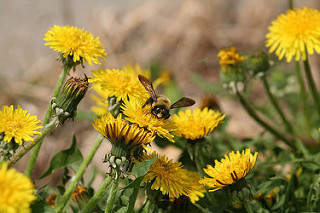

In [ ]:
PIL.Image.open(str(hoa_bo_cong_anh[10]))

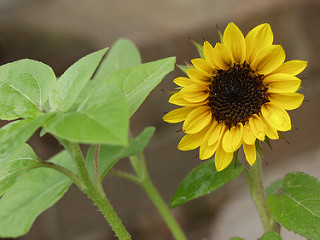

In [ ]:
#Hoa hướng dương
hoa_huong_duong = list(flower.glob('sunflowers/*'))
PIL.Image.open(str(hoa_huong_duong[6]))

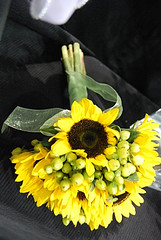

In [ ]:
PIL.Image.open(str(hoa_huong_duong[8]))

Tạo tập dữ liệu

In [ ]:
#Xác định một số tham số cho trình nạp: kích cỡ, cao, rộng
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#kiểm số lượng trước khi phát triển mô hình 
train = tf.keras.utils.image_dataset_from_directory(
  flower, validation_split=0.2, subset="training",
  seed=123, image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
#Tìm ra tên lớp trong train theo thứ tự bảng chữ cái
class_names = train.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
#Xác thực và Phân tách trước khi phát triển mô hình 
val = tf.keras.utils.image_dataset_from_directory(
  flower, validation_split=0.2, subset="validation",
  seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Trực quan hóa dữ liệu

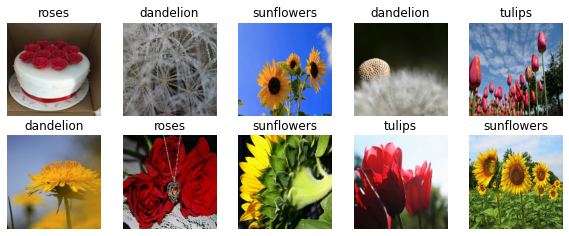

In [ ]:
#Phân tách ảnh theo thư mục
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Tạo mô hình
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#Biên dịch mô hình
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Tóm tắt mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#Đào tạo mô hình
epochs=10
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 110s 1s/step - loss: 1.4307 - accuracy: 0.3845 - val_loss: 1.1198 - val_accuracy: 0.5422
Epoch 2/10
92/92 [==============================] - 92s 992ms/step - loss: 1.0257 - accuracy: 0.6032 - val_loss: 0.9606 - val_accuracy: 0.6281
Epoch 3/10
92/92 [==============================] - 88s 958ms/step - loss: 0.8564 - accuracy: 0.6785 - val_loss: 0.9020 - val_accuracy: 0.6458
Epoch 4/10
92/92 [==============================] - 89s 960ms/step - loss: 0.6601 - accuracy: 0.7548 - val_loss: 0.9251 - val_accuracy: 0.6608
Epoch 5/10
92/92 [==============================] - 89s 963ms/step - loss: 0.4453 - accuracy: 0.8372 - val_loss: 1.0813 - val_accuracy: 0.6431
Epoch 6/10
92/92 [==============================] - 89s 968ms/step - loss: 0.2609 - accuracy: 0.9155 - val_loss: 1.2896 - val_accuracy: 0.6117
Epoch 7/10
92/92 [==============================] - 89s 968ms/step - loss: 0.1831 - accuracy: 0.9445 - val_loss: 1.4661 - val_accuracy: 0.6199
E

Kết quả đào tạo

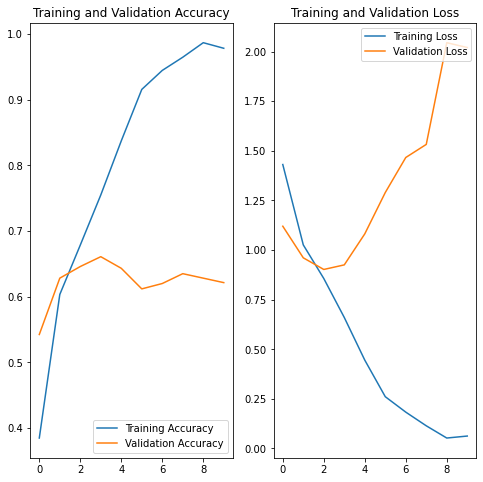

In [ ]:
#Biểu đồ thể hiện độ chính xác
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()